In [1]:
import json
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
with open('siparis.json',encoding="utf8") as f:
    data = json.load(f)


In [3]:
df = pd.DataFrame(data,columns = ['Comment','Brand','Sector'])
len(df)

98342

# Konu Basliklari

In [392]:
#print(df.Brand.value_counts())
#a = df.Brand.value_counts()


In [5]:
df["Sector"] = df.Brand.map(lambda sentences: None )

In [6]:
taşıma_list = ["Aras Kargo","Sürat Kargo","MNG Kargo","Horoz Lojistik","Trendyol Express","UPS Türkiye","hepsiJET","Getir"]
for i in taşıma_list:
    df.Sector[df.Brand == i ] = "Taşıma"

In [7]:
giyim_list = ["Penti","Boyner","DeFacto","Gratis", "LC Waikiki","FLO Ayakkabı","Bershka"]
for i in giyim_list:
    df.Sector[df.Brand == i ] = "Giyim"

In [8]:
yemek_list = ["Yemek Sepeti","Domino's Pizza","Protein Market"]
for i in yemek_list:
    df.Sector[df.Brand == i ] = "Yemek"

In [9]:
teknoloji_list = ["Media Markt"]
for i in teknoloji_list:
    df.Sector[df.Brand == i ] = "Teknoloji"

In [10]:
ev_esyasi_list = ["Evform","Tekzen","IKEA"]
for i in ev_esyasi_list:
    df.Sector[df.Brand == i ] = "EvEsyasi"

In [11]:
kitap_list = ["Kitap Seç","Bkm Kitap","D&R"]
for i in kitap_list:
    df.Sector[df.Brand == i ] = "Kitap"

In [12]:
ticaret_sitesi_list = ["Çiçek Sepeti","N11"]
for i in ticaret_sitesi_list:
    df.Sector[df.Brand == i ] = "ETicaret"

In [393]:
#for i in df["Sector"]:
    #print(i)

In [14]:
df1 = df.dropna()


In [394]:
#for i in df1["Sector"]:
#    print(i)
#len(df1)    

In [16]:
df1.Sector.value_counts()

Taşıma       22101
Giyim        14658
ETicaret      7583
Yemek         2477
Kitap         2475
EvEsyasi      2297
Teknoloji      646
Name: Sector, dtype: int64

In [17]:
#df1

# Alt Konu Basliklari

In [18]:
konu_list = ["Giyim","Taşıma","Yemek","Teknoloji","Ev Eşyası","Kitap"]
data_kitap = df1.Comment[df.Sector == "Kitap"]
data_giyim = df1.Comment[df.Sector == "Giyim"]
data_tasıma = df1.Comment[df.Sector == "Taşıma"]
data_yemek = df1.Comment[df.Sector == "Yemek"]
data_teknoloji = df1.Comment[df.Sector == "Teknoloji"]
data_esya = df1.Comment[df.Sector == "EvEsyasi"]

In [19]:
print("Kitap  =>",len(data_kitap)) 
print("Giyim  =>",len(data_giyim)) 
print("Tasima =>",len(data_tasıma))  
print("Yemek =>",len(data_yemek))  
print("Teknoloji =>",len(data_teknoloji))  
print("Esya =>",len(data_esya))  

Kitap  => 2475
Giyim  => 14658
Tasima => 22101
Yemek => 2477
Teknoloji => 646
Esya => 2297


# LDA

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = open('turkce-stop-words', 'r',encoding ='utf-8').read().split()
cv = CountVectorizer(max_df=0.5,min_df=2, stop_words=stop_words)
dtm  = cv.fit_transform(data_esya)

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,random_state=11)

lda_fit  = lda.fit(dtm)

# understanding each topics top 10 common words  
for id_value, value in enumerate(lda_fit.components_):
    print(f"The topic would be {id_value}") 
    print([cv.get_feature_names()[index] for index in value.argsort()   [-15:]])
    print("\n")

The topic would be 0
['verdiğim', 'ceva', 'ürünü', 'iade', 'geri', 'geldi', 'müşteri', 'horoz', 'ürün', 'lojistik', 'yok', 'gün', 'teslim', 'kargo', 'ikea']


The topic would be 1
['ürünün', 'tarihinde', 'aradım', 'siparişi', 'tüketici', 'verdim', 'iptal', 'iade', '2020', 'ay', 'gün', 'yok', 'müşteri', 'masa', 'ürün']


The topic would be 2
['eksik', 'verdim', 'iadesi', 'ay', 'yok', 'teslim', 'tekzen', 'ikea', 'gün', 'iptal', 'para', 'ürünü', 'müşteri', 'ürün', 'iade']


The topic would be 3
['firma', 'tl', 'siparişim', 'alışveriş', 'gün', 'kargoya', 'den', 'tarihinde', '2020', 'ikea', 'müşteri', 'ürün', 'kargo', 'tekzen', 'yok']


The topic would be 4
['07', 'ikea', 'numaralı', 'dönüş', 'tekzen', 'kargo', 'ürün', 'teslim', '06', 'gün', '05', 'müşteri', 'tarihinde', 'kargoya', '2020']




In [22]:
data_kitap_keyword = ["Kargo","stok","müşteri hizmetleri","iade"]

In [23]:
data_giyim_keyword = ["Kargo","stok","müşteri hizmetleri","iade"]

In [24]:
data_taşıma_keyword = ["Gecikme","şube","Dağıtım","müşteri hizmetleri","iade"]

In [25]:
data_yemek_keyword = ["Gecikme","Ödeme","Dağıtım","müsteri hizmetleri","şube","iade"]

In [26]:
data_teknoloji_keyword = ["Gecikme","stok","iade","müsteri hizmetleri"]

In [27]:
data_esya_keyword = ["Gecikme","stok","iade","müsteri hizmetleri"]

In [395]:
count = 0  #5556
#for i in data_esya:
  #  print(i)
  # count = count+1
   # print(count,"=================================================================")

In [396]:
count = 0  #615
#for  i in data_esya:
  #  if "eksik" in i:
     #   print(i)
     #   count = count+1
      #  print(count,"=================================================================")  


In [30]:
len(df1)

52237

In [31]:
df_model = pd.DataFrame(df1,columns = ['Comment','Brand','Sector','Gecikme','Şube','Dağıtım','Müşteri Hizmetleri',
                                       'Kargo','Stok','iade','Ödeme','Eksik Ürün'])



#df_model.sort_index(axis = 1) 
len(df_model)

52237

In [32]:
konu_list = ['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']
for i in konu_list:
    df_model[i] = df_model[i].map(lambda a: 0)
        

In [33]:
#["Giyim","Taşıma","Yemek","Teknoloji","Ev Eşyası","Kitap"]

df_giyim = df_model[df_model.Sector == "Giyim"]
df_tasima = df_model[df_model.Sector == "Taşıma"]
df_yemek = df_model[df_model.Sector == "Yemek"]
df_teknoloji = df_model[df_model.Sector == "Teknoloji"]
df_esya = df_model[df_model.Sector == "EvEsyasi"]
df_kitap = df_model[df_model.Sector == "Kitap"]


In [34]:
#df_esya

# Kargo

In [35]:
def check_value(sentence,anahtar):
    for word in anahtar:
        if word in sentence:
            return 1
    return 0    

In [36]:
anahtar = ["gecikme","teslim tarihi","gün"] 
df_tasima['Gecikme'] = df_tasima['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
anahtar = ["şube"] 
df_tasima['Şube'] = df_tasima['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
anahtar = ["dağıtım"] 
df_tasima['Dağıtım'] = df_tasima['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [397]:
#df_tasima

# Giyim

In [40]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [41]:
anahtar = ["kargo","tedarik"] 
df_giyim['Kargo'] = df_giyim['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
anahtar = ["Müşteri Hizmetleri","müşteri hizmetleri"] 
df_giyim['Müşteri Hizmetleri'] = df_giyim['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
anahtar = ["gecikme","teslim tarihi","gün"] 
df_giyim['iade'] = df_giyim['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
#df_giyim

# Kitap

In [45]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [46]:
anahtar = ["kargo","tedarik"] 
df_kitap['Kargo'] = df_kitap['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
anahtar = ["stok"] 
df_kitap['Stok'] = df_kitap['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
anahtar = ["müşteri hizmetleri"] 
df_kitap['Müşteri Hizmetleri'] = df_kitap['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [398]:
#df_kitap

# Yemek

In [50]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [51]:
anahtar = ["gecikme","dakika","saat"] 
df_yemek['Gecikme'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
anahtar = ["ödeme","fiyat","ücret"] 
df_yemek['Ödeme'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
anahtar = ["şube"] 
df_yemek['Şube'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
anahtar = ["iade"] 
df_yemek['iade'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
anahtar = ["müşteri hizmetleri"] 
df_yemek['Müşteri Hizmetleri'] = df_yemek['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [399]:
#df_yemek

# Teknoloji

In [57]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [58]:
anahtar = ["stok"] 
df_teknoloji['Stok'] = df_teknoloji['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
anahtar = ["iade","para"] 
df_teknoloji['iade'] = df_teknoloji['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
anahtar = ["gecikme","teslim","tarih","saat"] 
df_teknoloji['Gecikme'] = df_teknoloji['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
anahtar = ["müşteri hizmetleri"] 
df_teknoloji['Müşteri Hizmetleri'] = df_teknoloji['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [400]:
#df_teknoloji

# Esya

In [63]:
#['Gecikme','Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']

In [64]:
anahtar = ["iade"] 
df_esya['iade'] = df_esya['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
anahtar = ["müşteri hizmetleri"] 
df_esya['Müşteri Hizmetleri'] = df_esya['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
anahtar = ["gecikme","teslim","gün","tarih"] 
df_esya['Gecikme'] = df_esya['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
anahtar = ["eksik","eksik ürün","eksik parça"] 
df_esya['Eksik Ürün'] = df_esya['Comment'].map(lambda sentence: check_value(sentence,anahtar) )

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [401]:
#df_esya

In [69]:
count = len(df_esya) +len(df_giyim)+ len(df_kitap)+len(df_tasima)+ len(df_teknoloji)+len(df_yemek) 
print(count)
len(df1)

44654


52237

In [70]:
frames = [df_esya, df_giyim, df_kitap, df_tasima, df_teknoloji, df_yemek]
df_result = pd.concat(frames)

In [402]:
#df_result

In [186]:
from keras.layers import Dense, Embedding, LSTM  # Dense layerdaki noronlarin birbirine baglanmasini saglar
from numpy import loadtxt
from keras.models import Sequential
import seaborn as sn
from matplotlib import pyplot

In [187]:
turkish_characters = "a|b|c|ç|d|e|f|g|ğ|h|ı|i|j|k|l|m|n|o|ö|p|r|s|ş|t|u|ü|v|y|z|0-9"


In [250]:
df_result = df_result.sample(frac = 1) 
df_results_1 = df_result[:5000]


In [189]:
#df_results_1

# Gecikme

In [257]:
def Tokenize():# Veri setimizin işlenebilmesi için text verileri numaralara çevirmemiz gerekir.
    # Keras bu işlem için hazır bir mekanizma sunmaktadır.
    # Tokenizer sınıfı data içerisinde verilen cümleleri analiz ederek. Kelimelerin sıklıklarını hesaplar.
    # Parameter: num_words = En sık geçen 250 kelimeye odaklan. Diğerleri önemli değil
    tokenizer = Tokenizer(split=' ',num_words=2500)
    # Her bir kelimenin sıklığını(frekansını) hesaplar.
    tokenizer.fit_on_texts(df_results_1['Comment'].values)
    # Tüm cümleler tam sayı dizisine dönüştürülür.
    X = tokenizer.texts_to_sequences(df_results_1['Comment'].values)
    encoded_docs = X
    # Bütün metinlerimiz 400 sütundan oluşan bir dizi ile temsil edilecek.
    # Çok kısa metinler 0'lar ile doldurulacak. Çok uzun metinler ise kesilecek.
    X = pad_sequences(X,maxlen=400)

In [204]:
#print(df_results_1['Comment'].values[0])
#print(encoded_docs[0])
#print(X[0])

In [220]:

def build_model():
    embed_dim = 128
    lstm_out = 128
    model = Sequential()
    # Her bir kelimenin temsil edileceği vektör boyutu. Bu örnek için her bir kelime 128 boyutunda
    # bir vektör ile temsil edilir.
    #?Embedding LTSM and Dense nedir farklarina bakilacak
    model.add(Embedding(2500, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout_U=0.2, dropout_W=0.2))
    model.add(Dense(128,activation='relu'))  # 2 noron sayisi
    model.add(Dense(2,activation='softmax'))  # 2 noron sayisi
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    #optimizer =  ogrenme oranini kontrol eder, ogrenme orarnin ne kadar hizli hesaplanancaginin kontrol eder
    #metrics = modelin ne kadar iyi tahmin yaptiginin soyler
    return model

In [206]:
Y = pd.get_dummies(df_results_1['Gecikme']).values
#Y = pd.get_dummies(data=df_result, columns=['Gecikme', 'Şube','Dağıtım','Müşteri Hizmetleri','Kargo','Stok','iade','Ödeme','Eksik Ürün']).values


In [207]:
#Y 

In [208]:
def model_evaluate():# Verinin %80'i train, %20'si test verisi olacak şekilde ayrılır.
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)
    #random state =Controls the shuffling applied to the data before applying the split.

    model = build_model()
    # Oluşturulan model train verileri ile eğitilir. Yapay Sinir Ağı eğitilmeye başlar.
    # nb_epoch: İterasyon sayısı
    #batch_size : model egitilirken kacar orenek alinacaginin soylera

    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, Y_train, epochs = 3 , batch_size=32, verbose = 2, validation_split = 0.1)
    # Train verileri ile model eğitildikten sonra test dataları ile doğruluk oranlarına bakılır.
    #By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
    #Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset each epoch.
    #You can do this by setting the validation_split argument on the fit() function to a percentage of the size of your training dataset.

    #validation_split says: "hey give me all the input data – I will take care of splitting between test and validation".
    #validation_data says "please give me explicitly the validation data"

    score = model.evaluate(X_test, Y_test, verbose = 2)
    print("score: %.2f" % (score[1]))

In [210]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 84s - loss: 0.1836 - accuracy: 0.7156 - val_loss: 0.1341 - val_accuracy: 0.8289
Epoch 2/3
 - 86s - loss: 0.0955 - accuracy: 0.8723 - val_loss: 0.1237 - val_accuracy: 0.8422
Epoch 3/3
 - 87s - loss: 0.0846 - accuracy: 0.8998 - val_loss: 0.1396 - val_accuracy: 0.8244
score: 0.82


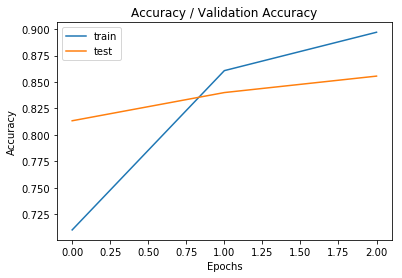

In [212]:
pyplot.title('Accuracy / Validation Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [151]:
a = ['1','2','3','4','5','6','7']

In [152]:
b = a[2:]

In [153]:
b

['3', '4', '5', '6', '7']

In [156]:
c = a[2:4]

In [157]:
c

['3', '4']

In [176]:
df_test = df_result[20000:20010] # 20 Tane
df_test

,Comment,Brand,Sector,Gecikme,Şube,Dağıtım,Müşteri Hizmetleri,Kargo,Stok,iade,Ödeme,Eksik Ürün
3142,Siparişim kapıya bırakıldı ve kuryeyle haliyle...,Getir,Taşıma,0,0,0,0,0,0,0,0,0
3150,26 Temmuz 2020 detrendyoldan bir alışveriş yap...,Sürat Kargo,Taşıma,1,0,0,0,0,0,0,0,0
3164,Ankara'dan Mersin'deki arkadaşıma ev hediyesi ...,Horoz Lojistik,Taşıma,0,0,0,0,0,0,0,0,0
3175,İkidir fırsat kolisinden sipariş verdiğim karg...,MNG Kargo,Taşıma,0,0,0,0,0,0,0,0,0
3181,Pazar günü Trendyol dan sipariş verdim. Pazart...,Trendyol Express,Taşıma,1,0,0,0,0,0,0,0,0
3190,Bir TV ünitesi sipariş ettim. Aras Kargo'yla g...,Aras Kargo,Taşıma,0,0,0,0,0,0,0,0,0
3192,5308*36*033* numaralı siparişim evime bile uğr...,MNG Kargo,Taşıma,1,1,0,0,0,0,0,0,0
3194,12 ağustostan beri siparişim kargoda bekliyor ...,Trendyol Express,Taşıma,0,0,0,0,0,0,0,0,0
3196,Sipariş etmiş olduğum 3 adet pantolon yerine 2...,Aras Kargo,Taşıma,0,0,0,0,0,0,0,0,0
3247,"İnternet sipariş etik, gönderici Aras Kargo se...",Aras Kargo,Taşıma,1,1,0,0,0,0,0,0,0


In [179]:
df_test = df_test['Comment'].tolist()

In [180]:


# Verilen örnekler Tokenizer yapısı ile tam sayı dizisine dönüştürülür
# Daha sonra eğitilen modele sırayla verilerek anlam analizi sonuçları elde edilir.
# Her Cümlenin yüzde kaç olumlu ve olumsuz olduğuna dair bilgiler çıktı olarak verilir.
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.6784093  0.3215907 ]
 [0.9809795  0.01902047]
 [0.14967081 0.85032916]
 [0.9238201  0.07617984]
 [0.82795525 0.17204481]
 [0.9985643  0.00143576]
 [0.9860265  0.01397343]
 [0.99126714 0.00873286]
 [0.92149454 0.07850544]
 [0.90409935 0.09590064]]


# Sube

In [253]:
df_results_1 = df_result[10000:15000]


In [254]:
df_results_1['Şube'].value_counts()

0    3939
1    1061
Name: Şube, dtype: int64

In [258]:
Tokenize()

In [259]:
#Sector	Gecikme	Şube	Dağıtım	Müşteri Hizmetleri	Kargo	Stok	iade	Ödeme	Eksik Ürün
Y = pd.get_dummies(df_results_1['Şube']).values


In [260]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 85s - loss: 0.1695 - accuracy: 0.7896 - val_loss: 0.1908 - val_accuracy: 0.7533
Epoch 2/3
 - 87s - loss: 0.1543 - accuracy: 0.7946 - val_loss: 0.1956 - val_accuracy: 0.7422
Epoch 3/3
 - 87s - loss: 0.1224 - accuracy: 0.8368 - val_loss: 0.2118 - val_accuracy: 0.7311
score: 0.74


In [284]:
df_test = df_result[20000:20010] # 20 Tane
#df_test

In [285]:
df_test = df_test['Comment'].tolist()
#df_test

In [286]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.5007127  0.49928737]
 [0.49788496 0.50211495]
 [0.50977093 0.49022907]
 [0.4975782  0.5024218 ]
 [0.5014851  0.4985149 ]
 [0.5012429  0.49875715]
 [0.4978277  0.50217235]
 [0.49605587 0.5039441 ]
 [0.49909306 0.500907  ]
 [0.50556546 0.4944345 ]]


# Dağıtım

In [ ]:
##Sector	Gecikme	Şube	Dağıtım	Müşteri Hizmetleri	Kargo	Stok	iade	Ödeme	Eksik Ürün

In [295]:
df_results_1 = df_result[25000:30000]


In [297]:
df_results_1['Dağıtım'].value_counts()

0    4613
1     387
Name: Dağıtım, dtype: int64

In [298]:
Tokenize()

In [299]:
Y = pd.get_dummies(df_results_1['Dağıtım']).values


In [300]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 92s - loss: 0.0855 - accuracy: 0.9183 - val_loss: 0.0711 - val_accuracy: 0.9289
Epoch 2/3
 - 89s - loss: 0.0758 - accuracy: 0.9242 - val_loss: 0.0711 - val_accuracy: 0.9289
Epoch 3/3
 - 87s - loss: 0.0758 - accuracy: 0.9242 - val_loss: 0.0711 - val_accuracy: 0.9289
score: 0.90


In [301]:
df_test = df_result[20000:20010] # 20 Tane
df_test

,Comment,Brand,Sector,Gecikme,Şube,Dağıtım,Müşteri Hizmetleri,Kargo,Stok,iade,Ödeme,Eksik Ürün
54061,Sipariş Numarası: 1201************12 beklettik...,IKEA,EvEsyasi,1,0,0,0,0,0,0,0,0
61289,Trendyol'dan 27 Mayıs'ta sipariş verdiğim ürün...,Sürat Kargo,Taşıma,0,0,0,0,0,0,0,0,0
40125,Morhipo alışverişim Aras Kargo ile gönderilece...,Aras Kargo,Taşıma,1,1,1,0,0,0,0,0,0
78102,14.5.2020 tarihinde verdiğim W115473660 numara...,D&R,Kitap,0,0,0,0,1,0,0,0,0
79307,Trendyol üzerinden 8 Mayıs'ta sipariş vermişti...,MNG Kargo,Taşıma,1,1,1,0,0,0,0,0,0
31644,Trendyol'dan 23.06.2020 de sipariş verdiğim ür...,Sürat Kargo,Taşıma,0,0,1,0,0,0,0,0,0
26740,Siparişime ait kargonun 13.07.2020 tarihinde s...,MNG Kargo,Taşıma,0,1,1,0,0,0,0,0,0
77192,20/05/2020 de sipariş verdiğim ürün hakkında b...,Boyner,Giyim,0,0,0,0,1,0,1,0,0
33370,Trendyol'dan Dermaroller sipariş verdim aynı a...,Sürat Kargo,Taşıma,0,0,0,0,0,0,0,0,0
94640,11 gün önce sipariş verdiğim ürün hala tedarik...,Boyner,Giyim,0,0,0,0,1,0,1,0,0


In [302]:
df_test = df_test['Comment'].tolist()
#df_test

In [303]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.5007127  0.49928737]
 [0.49788496 0.50211495]
 [0.50977093 0.49022907]
 [0.4975782  0.5024218 ]
 [0.5014851  0.4985149 ]
 [0.5012429  0.49875715]
 [0.4978277  0.50217235]
 [0.49605587 0.5039441 ]
 [0.49909306 0.500907  ]
 [0.50556546 0.4944345 ]]


# Müşteri Hizmetleri

In [310]:
df_results_1 = df_result[15000:20000]

In [311]:
df_results_1['Müşteri Hizmetleri'].value_counts()

0    4515
1     485
Name: Müşteri Hizmetleri, dtype: int64

In [312]:
Tokenize()

In [313]:
Y = pd.get_dummies(df_results_1['Müşteri Hizmetleri']).values


In [314]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 85s - loss: 0.1006 - accuracy: 0.8948 - val_loss: 0.0825 - val_accuracy: 0.9089
Epoch 2/3
 - 86s - loss: 0.0843 - accuracy: 0.9012 - val_loss: 0.0850 - val_accuracy: 0.9089
Epoch 3/3
 - 89s - loss: 0.0702 - accuracy: 0.9116 - val_loss: 0.0991 - val_accuracy: 0.8689
score: 0.90


In [316]:
df_test = df_result[1000:1010] # 20 Tane
df_test

,Comment,Brand,Sector,Gecikme,Şube,Dağıtım,Müşteri Hizmetleri,Kargo,Stok,iade,Ödeme,Eksik Ürün
28399,Kargomuz 1 hafta oldu gelmedi. Babaannem adına...,MNG Kargo,Taşıma,0,1,1,0,0,0,0,0,0
34598,13.05.2020 tarihinde sipariş verdiğim Zen Home...,Tekzen,EvEsyasi,1,0,0,1,0,0,0,0,0
45761,Trendyol'dan istettiğim siparişim MNG Kargo il...,MNG Kargo,Taşıma,0,0,0,0,0,0,0,0,0
72051,Boyner'in internet sitesinden den 22 Mayıs'ta ...,Boyner,Giyim,0,0,0,0,1,0,1,0,0
28789,01.07.20 aldığım ürün Aras Kargo ile gönderild...,Aras Kargo,Taşıma,1,1,0,0,0,0,0,0,0
85497,1275**56 05.05.2020 de verdiğim siparişlerden ...,DeFacto,Giyim,0,0,0,0,1,0,0,0,0
16653,16.07 Tarihinde Koçtaş'tan siparişimi teslim a...,Horoz Lojistik,Taşıma,0,0,0,0,0,0,0,0,0
23867,29 Haziran'da verdiğim 7267500 sipariş numaral...,Boyner,Giyim,0,0,0,0,1,0,1,0,0
16707,3 Haziran 2020'de verdiğimiz 210306201026616 n...,IKEA,EvEsyasi,0,0,0,0,0,0,1,0,0
46367,31 Mayıs tarihinde satın aldığım 100... 4505 n...,Boyner,Giyim,0,0,0,1,1,0,1,0,0


In [317]:
df_test = df_test['Comment'].tolist()
#df_test

In [318]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.501923   0.49807706]
 [0.50098485 0.49901506]
 [0.50145805 0.49854192]
 [0.5024906  0.49750948]
 [0.50157595 0.49842402]
 [0.49829498 0.50170505]
 [0.50394994 0.49605006]
 [0.49627087 0.5037291 ]
 [0.5005573  0.49944267]
 [0.5034695  0.4965304 ]]


# KARGO

In [197]:
#'Gecikme	Sube	Dagitim	m_hizmetleri	Kargo	Stok	iade	odeme	eksin_urun

In [225]:
Y = pd.get_dummies(df_results_1['Kargo']).values


In [226]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 95s - loss: 0.1892 - accuracy: 0.7205 - val_loss: 0.1832 - val_accuracy: 0.7444
Epoch 2/3
 - 93s - loss: 0.1142 - accuracy: 0.8516 - val_loss: 0.1354 - val_accuracy: 0.8200
Epoch 3/3
 - 93s - loss: 0.1028 - accuracy: 0.8674 - val_loss: 0.1438 - val_accuracy: 0.8156
score: 0.85


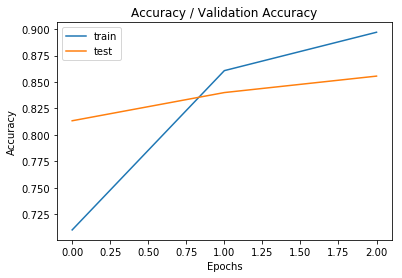

In [228]:
pyplot.title('Accuracy / Validation Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [235]:
df_test = df_result[6000:6010] # 10 Tane
df_test

,Comment,Brand,Sector,Gecikme,Şube,Dağıtım,Müşteri Hizmetleri,Kargo,Stok,iade,Ödeme,Eksik Ürün
30119,19/06/2020 de taraflarına ulaşan 4000***7600 n...,Bershka,Giyim,0,0,0,0,0,0,0,0,0
30132,24.06.2020 tarihinde 3180.02 TL tutarında onli...,LC Waikiki,Giyim,0,0,0,0,0,0,1,0,0
30135,2007061006023 numaralı siparişimde bilgim olma...,LC Waikiki,Giyim,0,0,0,0,1,0,0,0,0
30137,Ayakkabı aldım sitenizde siparişler kısmında g...,Boyner,Giyim,0,0,0,0,1,0,1,0,0
30138,Dün gece 8 adet t-shirt ve mutfak eşyası sipar...,DeFacto,Giyim,0,0,0,0,1,0,0,0,0
30156,Geçen haftalarda online siteden oğluma bir ürü...,LC Waikiki,Giyim,0,0,0,1,1,0,1,0,0
30166,"03/06/2020 tarihinde vermiş olduğum,4000656485...",Bershka,Giyim,0,0,0,0,0,0,1,0,0
30179,07/07/2020 tarihinde 2007****35002 numaralı si...,LC Waikiki,Giyim,0,0,0,0,0,0,0,0,0
30182,Ankara Keçiören Bağlarbaşı Kızlarpınarı Cad ma...,LC Waikiki,Giyim,0,0,0,0,0,0,0,0,0
30184,29.06.20 tarihinde elime ulaşan siparişimde ek...,LC Waikiki,Giyim,0,0,0,0,0,0,0,0,0


In [236]:
df_test = df_test['Comment'].tolist()

In [237]:
# Verilen örnekler Tokenizer yapısı ile tam sayı dizisine dönüştürülür
# Daha sonra eğitilen modele sırayla verilerek anlam analizi sonuçları elde edilir.
# Her Cümlenin yüzde kaç olumlu ve olumsuz olduğuna dair bilgiler çıktı olarak verilir.
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.5028876  0.49711233]
 [0.5089845  0.49101555]
 [0.49899632 0.50100374]
 [0.50101465 0.49898526]
 [0.50128937 0.4987107 ]
 [0.49633962 0.5036603 ]
 [0.5055324  0.49446768]
 [0.5061464  0.49385357]
 [0.50343126 0.49656874]
 [0.50458056 0.49541944]]


# Stok

In [ ]:
#Stok	iade	Ödeme	Eksik Ürün

In [332]:
df_results_1 = df_result[30000:35000]

In [333]:
df_results_1['Stok'].value_counts()

0    4938
1      62
Name: Stok, dtype: int64

In [334]:
Tokenize()

In [335]:
Y = pd.get_dummies(df_results_1['Stok']).values


In [336]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 95s - loss: 0.0259 - accuracy: 0.9830 - val_loss: 0.0222 - val_accuracy: 0.9778
Epoch 2/3
 - 91s - loss: 0.0119 - accuracy: 0.9881 - val_loss: 0.0222 - val_accuracy: 0.9778
Epoch 3/3
 - 99s - loss: 0.0119 - accuracy: 0.9881 - val_loss: 0.0222 - val_accuracy: 0.9778
score: 0.99


In [360]:
df_test = df_result[40200:40210] # 20 Tane
df_test

,Comment,Brand,Sector,Gecikme,Şube,Dağıtım,Müşteri Hizmetleri,Kargo,Stok,iade,Ödeme,Eksik Ürün
89783,18 Mayıs tarihinde 2 adet kitap sipariş verdim...,Kitap Seç,Kitap,0,0,0,0,1,1,0,0,0
92208,21.05.2020 tarihinde verdiğim 8135******23 tak...,Aras Kargo,Taşıma,1,1,0,0,0,0,0,0,0
51696,"Tekzen'den 1,5 ay önce masa siparişi verdim. S...",Tekzen,EvEsyasi,1,0,0,0,0,0,1,0,0
43772,Bir ay bekledikten sonra gelen siparişimin baş...,Penti,Giyim,0,0,0,0,1,0,0,0,0
60042,Trendyol'dan vermiş olduğum siparişi MNG Kargo...,MNG Kargo,Taşıma,1,0,0,0,0,0,0,0,0
95803,19.05.2020 tarihinde Media Markt internet site...,Media Markt,Teknoloji,1,0,0,1,0,0,0,0,0
60876,20/05/2020 tarihinde sipariş verdiğim ürün 2 h...,Tekzen,EvEsyasi,1,0,0,0,0,0,0,0,0
73468,Yaklaşık 2 ay önce 2 t-shirt sipariş verdim. B...,DeFacto,Giyim,0,0,0,0,1,0,1,0,0
61142,29.05'te verdiğim sipariş 02.06'da UPS Türkiye...,UPS Türkiye,Taşıma,1,0,0,0,0,0,0,0,0
92827,25 Mayıs pazartesi sipariş verdiğim p305***135...,Gratis,Giyim,0,0,0,0,0,0,0,0,0


In [361]:
df_test = df_test['Comment'].tolist()
#df_test

In [362]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.49956816 0.50043184]
 [0.50410515 0.49589482]
 [0.5049621  0.4950379 ]
 [0.5022328  0.49776727]
 [0.505591   0.49440897]
 [0.50303245 0.4969676 ]
 [0.5030588  0.49694124]
 [0.50473243 0.49526748]
 [0.50479996 0.4952    ]
 [0.5013902  0.49860978]]


# iade

In [363]:
df_results_1 = df_result[30000:35000]

In [364]:
df_results_1['iade'].value_counts()

0    3920
1    1080
Name: iade, dtype: int64

In [365]:
Tokenize()

In [366]:
Y = pd.get_dummies(df_results_1['iade']).values


In [367]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 88s - loss: 0.1732 - accuracy: 0.7847 - val_loss: 0.1819 - val_accuracy: 0.7622
Epoch 2/3
 - 87s - loss: 0.1584 - accuracy: 0.7862 - val_loss: 0.1841 - val_accuracy: 0.7578
Epoch 3/3
 - 92s - loss: 0.1272 - accuracy: 0.8237 - val_loss: 0.2048 - val_accuracy: 0.7489
score: 0.73


In [368]:
df_test = df_result[1000:1010] # 20 Tane
df_test

,Comment,Brand,Sector,Gecikme,Şube,Dağıtım,Müşteri Hizmetleri,Kargo,Stok,iade,Ödeme,Eksik Ürün
28399,Kargomuz 1 hafta oldu gelmedi. Babaannem adına...,MNG Kargo,Taşıma,0,1,1,0,0,0,0,0,0
34598,13.05.2020 tarihinde sipariş verdiğim Zen Home...,Tekzen,EvEsyasi,1,0,0,1,0,0,0,0,0
45761,Trendyol'dan istettiğim siparişim MNG Kargo il...,MNG Kargo,Taşıma,0,0,0,0,0,0,0,0,0
72051,Boyner'in internet sitesinden den 22 Mayıs'ta ...,Boyner,Giyim,0,0,0,0,1,0,1,0,0
28789,01.07.20 aldığım ürün Aras Kargo ile gönderild...,Aras Kargo,Taşıma,1,1,0,0,0,0,0,0,0
85497,1275**56 05.05.2020 de verdiğim siparişlerden ...,DeFacto,Giyim,0,0,0,0,1,0,0,0,0
16653,16.07 Tarihinde Koçtaş'tan siparişimi teslim a...,Horoz Lojistik,Taşıma,0,0,0,0,0,0,0,0,0
23867,29 Haziran'da verdiğim 7267500 sipariş numaral...,Boyner,Giyim,0,0,0,0,1,0,1,0,0
16707,3 Haziran 2020'de verdiğimiz 210306201026616 n...,IKEA,EvEsyasi,0,0,0,0,0,0,1,0,0
46367,31 Mayıs tarihinde satın aldığım 100... 4505 n...,Boyner,Giyim,0,0,0,1,1,0,1,0,0


In [369]:
df_test = df_test['Comment'].tolist()
#df_test

In [370]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.501923   0.49807706]
 [0.50098485 0.49901506]
 [0.50145805 0.49854192]
 [0.5024906  0.49750948]
 [0.50157595 0.49842402]
 [0.49829498 0.50170505]
 [0.50394994 0.49605006]
 [0.49627087 0.5037291 ]
 [0.5005573  0.49944267]
 [0.5034695  0.4965304 ]]


# Ödeme

In [371]:
df_results_1 = df_result[30000:35000]

In [372]:
df_results_1['Ödeme'].value_counts()

0    4928
1      72
Name: Ödeme, dtype: int64

In [373]:
Tokenize()

In [374]:
Y = pd.get_dummies(df_results_1['Ödeme']).values


In [375]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 98s - loss: 0.0291 - accuracy: 0.9822 - val_loss: 0.0111 - val_accuracy: 0.9889
Epoch 2/3
 - 99s - loss: 0.0153 - accuracy: 0.9847 - val_loss: 0.0111 - val_accuracy: 0.9889
Epoch 3/3
 - 97s - loss: 0.0153 - accuracy: 0.9847 - val_loss: 0.0111 - val_accuracy: 0.9889
score: 0.99


In [379]:
df_test = df_result[2000:2010] # 20 Tane
df_test

,Comment,Brand,Sector,Gecikme,Şube,Dağıtım,Müşteri Hizmetleri,Kargo,Stok,iade,Ödeme,Eksik Ürün
35803,Gratis internet mağazasından 9 Haziran 2020 de...,Gratis,Giyim,0,0,0,0,0,0,1,0,0
69083,1006**1307 sipariş numarası ile 16 Mayıs 2020 ...,Boyner,Giyim,0,0,0,1,1,0,1,0,0
92495,Sırf MNG Kargo'nun kargomu bana ulaştıramadığı...,MNG Kargo,Taşıma,0,0,0,0,0,0,0,0,0
4890,9 Ağustos'ta kedi tuvaleti siparişi verdim. 1...,MNG Kargo,Taşıma,1,1,0,0,0,0,0,0,0
50757,15 gün oldu sipariş vereli hala gelecek. Samsu...,Sürat Kargo,Taşıma,1,1,0,0,0,0,0,0,0
48524,Pizza teslim edilmedi. Fakat pizza takipte piz...,Domino's Pizza,Yemek,1,1,0,0,0,0,0,1,0
61701,Pazartesi yola çıkan kargom 2 gündür hala dağı...,MNG Kargo,Taşıma,1,1,1,0,0,0,0,0,0
7196,1 adet delta plates çemberi sipariş ettim 23.0...,Trendyol Express,Taşıma,0,1,0,0,0,0,0,0,0
62096,N11.com'dan sipariş ettiğim ürünün bir haftada...,Aras Kargo,Taşıma,1,1,0,0,0,0,0,0,0
44274,Kuşadası Sürat Kargo aracılığıyla. 10524520842...,Sürat Kargo,Taşıma,1,0,1,0,0,0,0,0,0


In [380]:
df_test = df_test['Comment'].tolist()
#df_test

In [381]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.49741423 0.50258577]
 [0.49884778 0.5011522 ]
 [0.5001815  0.4998185 ]
 [0.498162   0.501838  ]
 [0.50132513 0.4986749 ]
 [0.5011659  0.49883413]
 [0.5018207  0.49817938]
 [0.5031023  0.49689764]
 [0.5039035  0.49609643]
 [0.5026198  0.4973802 ]]


# Eksik Ürün

In [384]:
df_results_1 = df_result[20000:25000]

In [385]:
df_results_1['Eksik Ürün'].value_counts()

0    4976
1      24
Name: Eksik Ürün, dtype: int64

In [386]:
Tokenize()

In [387]:
Y = pd.get_dummies(df_results_1['Eksik Ürün']).values


In [388]:
model_evaluate()

C:\Users\yasin\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  if __name__ == '__main__':


Train on 4050 samples, validate on 450 samples
Epoch 1/3
 - 89s - loss: 0.0185 - accuracy: 0.9899 - val_loss: 0.0044 - val_accuracy: 0.9956
Epoch 2/3
 - 94s - loss: 0.0049 - accuracy: 0.9951 - val_loss: 0.0044 - val_accuracy: 0.9956
Epoch 3/3
 - 99s - loss: 0.0049 - accuracy: 0.9951 - val_loss: 0.0044 - val_accuracy: 0.9956
score: 1.00


In [389]:
df_test = df_result[1000:1010] # 20 Tane
df_test

,Comment,Brand,Sector,Gecikme,Şube,Dağıtım,Müşteri Hizmetleri,Kargo,Stok,iade,Ödeme,Eksik Ürün
28399,Kargomuz 1 hafta oldu gelmedi. Babaannem adına...,MNG Kargo,Taşıma,0,1,1,0,0,0,0,0,0
34598,13.05.2020 tarihinde sipariş verdiğim Zen Home...,Tekzen,EvEsyasi,1,0,0,1,0,0,0,0,0
45761,Trendyol'dan istettiğim siparişim MNG Kargo il...,MNG Kargo,Taşıma,0,0,0,0,0,0,0,0,0
72051,Boyner'in internet sitesinden den 22 Mayıs'ta ...,Boyner,Giyim,0,0,0,0,1,0,1,0,0
28789,01.07.20 aldığım ürün Aras Kargo ile gönderild...,Aras Kargo,Taşıma,1,1,0,0,0,0,0,0,0
85497,1275**56 05.05.2020 de verdiğim siparişlerden ...,DeFacto,Giyim,0,0,0,0,1,0,0,0,0
16653,16.07 Tarihinde Koçtaş'tan siparişimi teslim a...,Horoz Lojistik,Taşıma,0,0,0,0,0,0,0,0,0
23867,29 Haziran'da verdiğim 7267500 sipariş numaral...,Boyner,Giyim,0,0,0,0,1,0,1,0,0
16707,3 Haziran 2020'de verdiğimiz 210306201026616 n...,IKEA,EvEsyasi,0,0,0,0,0,0,1,0,0
46367,31 Mayıs tarihinde satın aldığım 100... 4505 n...,Boyner,Giyim,0,0,0,1,1,0,1,0,0


In [390]:
df_test = df_test['Comment'].tolist()
#df_test

In [391]:
sequences = tokenizer.texts_to_sequences(df_test)
data = pad_sequences(sequences, maxlen=400)
predictions = model.predict(data)
print(predictions)

[[0.501923   0.49807706]
 [0.50098485 0.49901506]
 [0.50145805 0.49854192]
 [0.5024906  0.49750948]
 [0.50157595 0.49842402]
 [0.49829498 0.50170505]
 [0.50394994 0.49605006]
 [0.49627087 0.5037291 ]
 [0.5005573  0.49944267]
 [0.5034695  0.4965304 ]]
